# Extra problem

## Описание проекта
Интернет-магазин «Победа качества» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«Победа качества»» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра-аналитика в этом отделе.

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Данные для работы находятся в нескольких таблицах:

market_file.csv

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

id — номер покупателя в корпоративной базе данных.
Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
market_money.csv

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

id — номер покупателя в корпоративной базе данных.
Период — название периода, во время которого зафиксирована выручка. Например,
'текущий_месяц' или 'предыдущий_месяц'.

Выручка — сумма выручки за период.
market_time.csv

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

id — номер покупателя в корпоративной базе данных.
Период — название периода, во время которого зафиксировано общее время.
минут — значение времени, проведённого на сайте, в минутах.
money.csv

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

id — номер покупателя в корпоративной базе данных.
Прибыль — значение прибыли.
forecast_chan.csv

Результат работы специалиста DS. Таблица вероятности снижения покупательской активности клиента.

id — номер покупателя в корпоративной базе данных.
вероятность — вероятность снижения покупательской активности клиента


In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, chi2_contingency
from scipy.stats import spearmanr

# 1. Чтение

### market_file

In [345]:
market_file = pd.read_csv('market_file.csv', encoding='UTF-8', skipinitialspace=True, delimiter=',')

In [346]:
market_file.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


In [347]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [348]:
market_file.iloc[:, 1:].describe()

,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


In [349]:
def draw_plots(df):
    numerics = df.select_dtypes(include=['float64', 'int64']).columns
    columns = df.columns.unique()
    rows = int(round(len(columns) / 2, 0))
    f, ax = plt.subplots(2, rows, figsize=(48, 18))
    for i in range(len(columns)):
        x, y = i // rows, i % rows
        if columns[i] in numerics:
            sns.boxplot(data=df, x=columns[i], ax=ax[x, y])
        elif columns[i].lower() == 'популярная_категория':
            df[columns[i]].value_counts().plot(kind='bar', ax=ax[x, y])
        elif columns[i] not in numerics:
            sns.countplot(data=df, x=columns[i], ax=ax[x, y])
        ax[x, y].set_xlabel(columns[i], fontsize=25)
        ax[x, y].tick_params(axis='x', labelsize=21)
        plt.tight_layout()
        

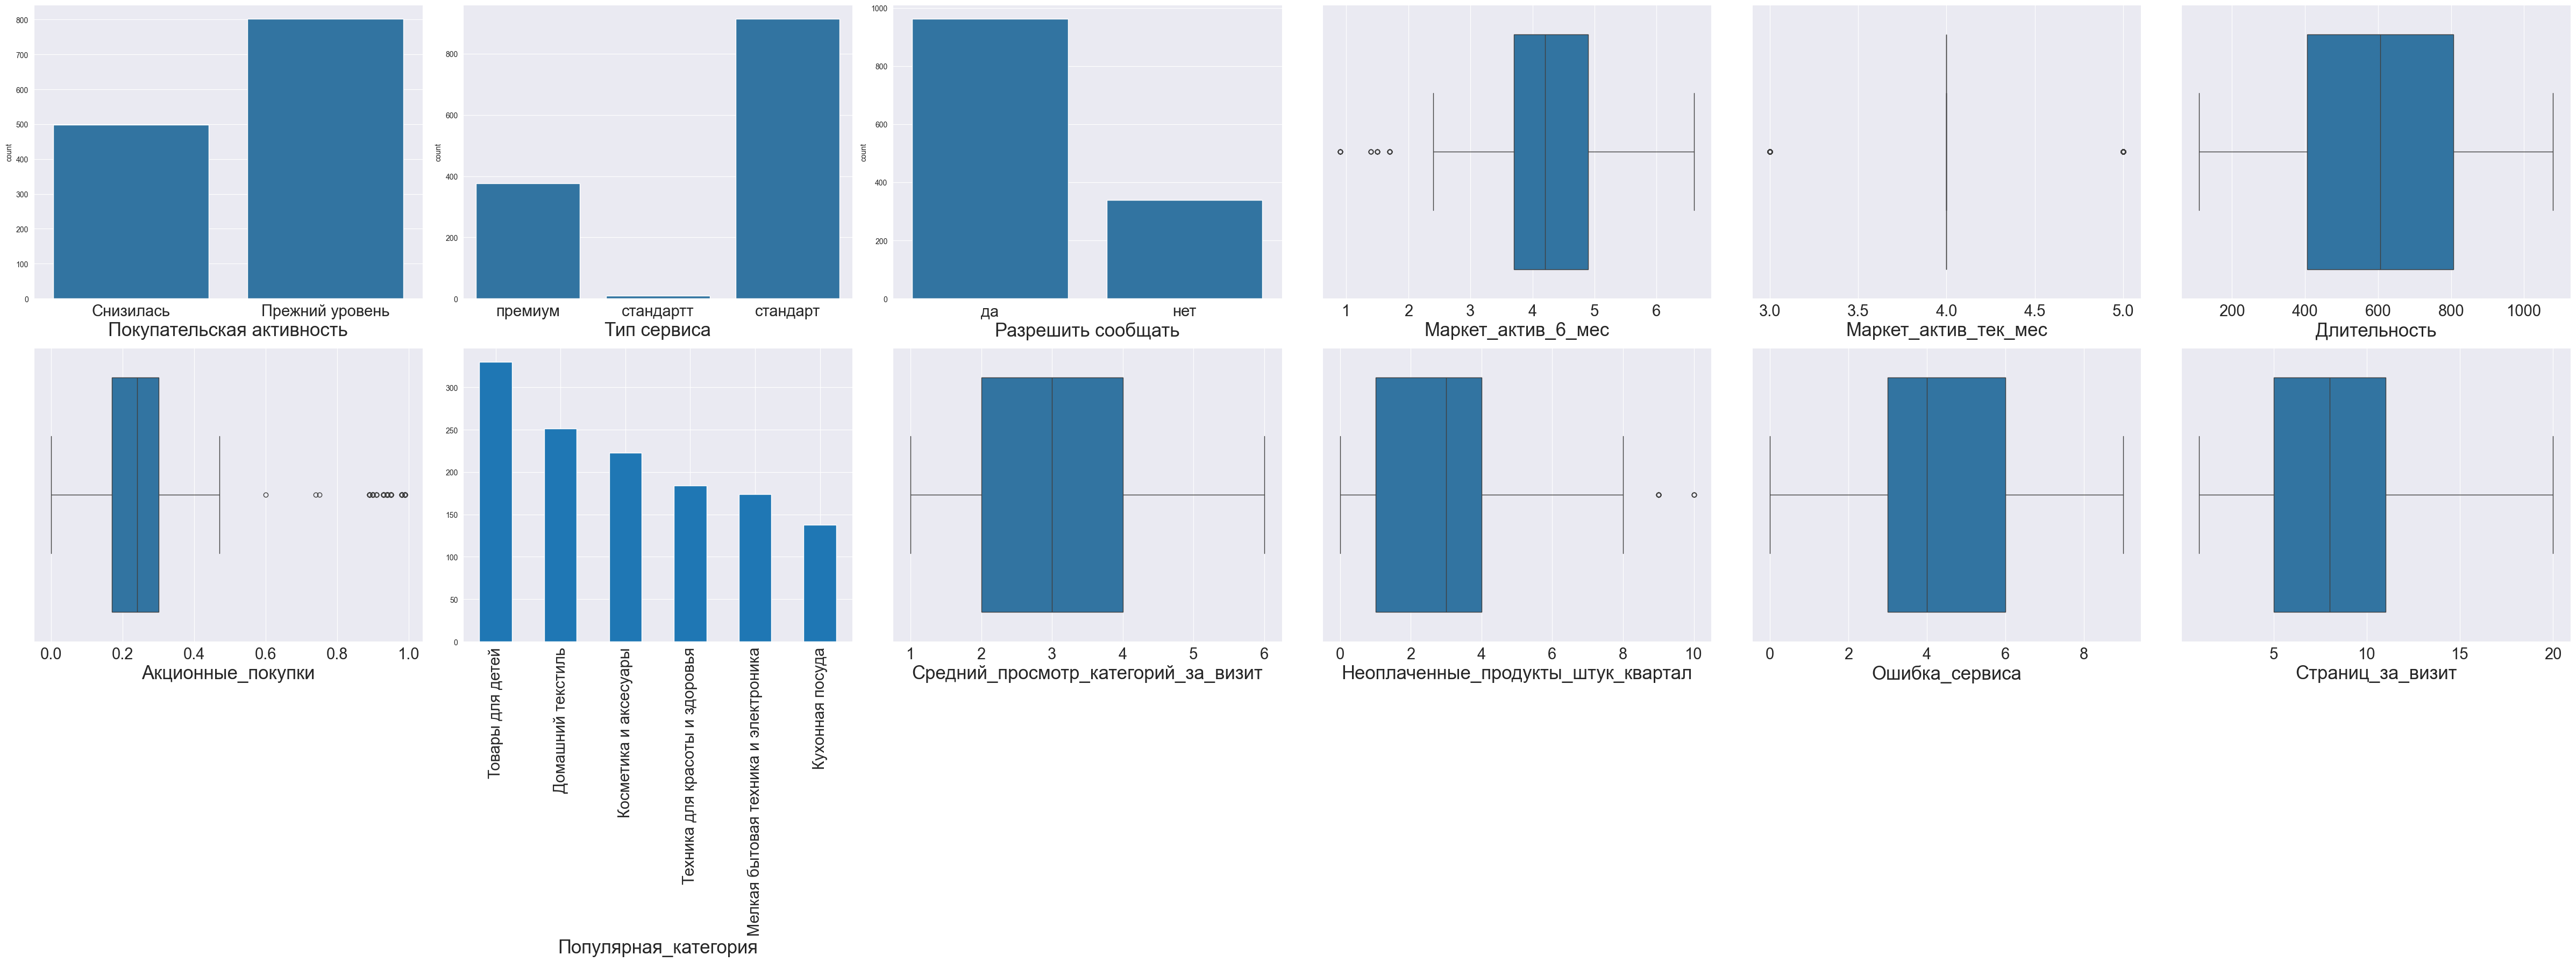

In [350]:
draw_plots(market_file.iloc[:, 1:])

Здесь мы можем заметить ошибку в колонке Тип сервиса, там есть стандартт вместо стандарт, также перечертим график Маркет_актив_тек_мес гистограммой для наглядности

<Axes: xlabel='Маркет_актив_тек_мес', ylabel='Count'>

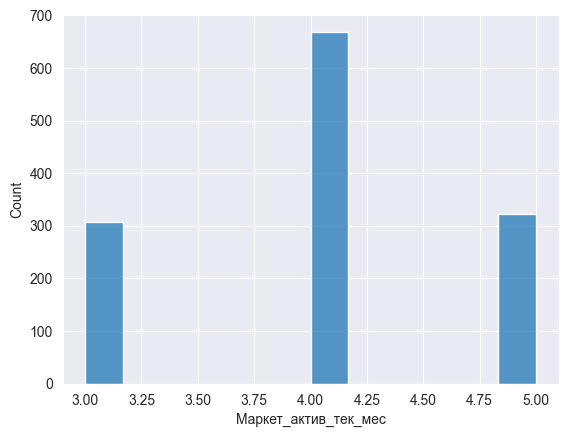

In [351]:
sns.histplot(data=market_file, x='Маркет_актив_тек_мес')

<Axes: xlabel='Популярная_категория'>

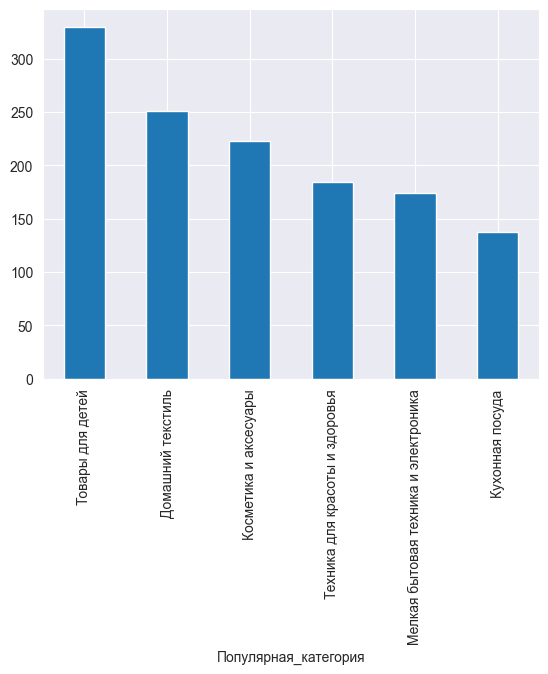

In [352]:
market_file['Популярная_категория'].value_counts().plot(kind='bar')

### market_money

In [353]:
market_money = pd.read_csv('market_money.csv', encoding='UTF-8', skipinitialspace=True, delimiter=',')

In [354]:
market_money.head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [355]:
grouped_market_money = market_money.groupby(['id']).sum().reset_index()
grouped_market_money.loc[grouped_market_money['Выручка'] == 0]

,id,Период,Выручка


## !!Значит все покупатели вели покупательскую активность за 3 месяца

In [356]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [357]:
market_money.iloc[:, 1:].describe()

,Выручка
count,3900.000000
mean,5025.696051
std,1777.704104
min,0.000000
25%,4590.150000
50%,4957.500000
75%,5363.000000
max,106862.200000


Значение max здесь заоблачное, поэтому подозреваю, что это супервыброс

<Axes: xlabel='Выручка'>

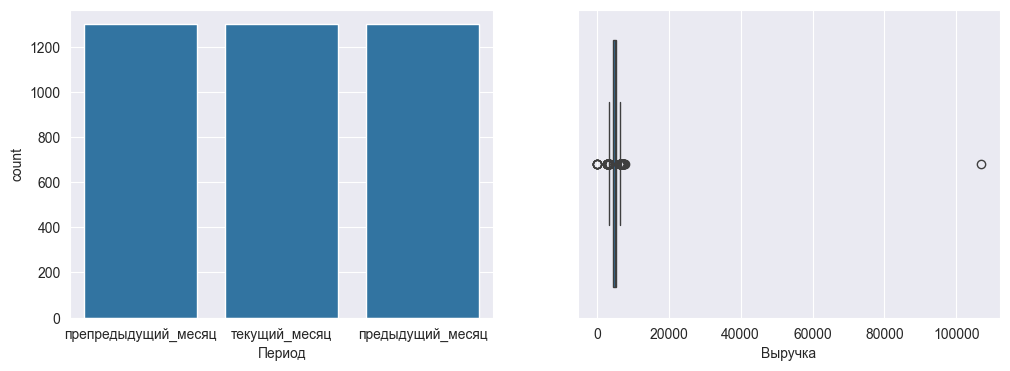

In [358]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=market_money, x='Период', ax=ax[0])
sns.boxplot(data=market_money, x='Выручка', ax=ax[1]) # супервыброс

### market_time

In [359]:
market_time = pd.read_csv('market_time.csv', encoding='UTF-8', skipinitialspace=True, delimiter=',')

In [360]:
market_time.head(10)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


In [361]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [362]:
market_time.iloc[:, 1:].describe()

,минут
count,2600.000000
mean,13.336154
std,4.080198
min,4.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,23.000000


<Axes: xlabel='минут'>

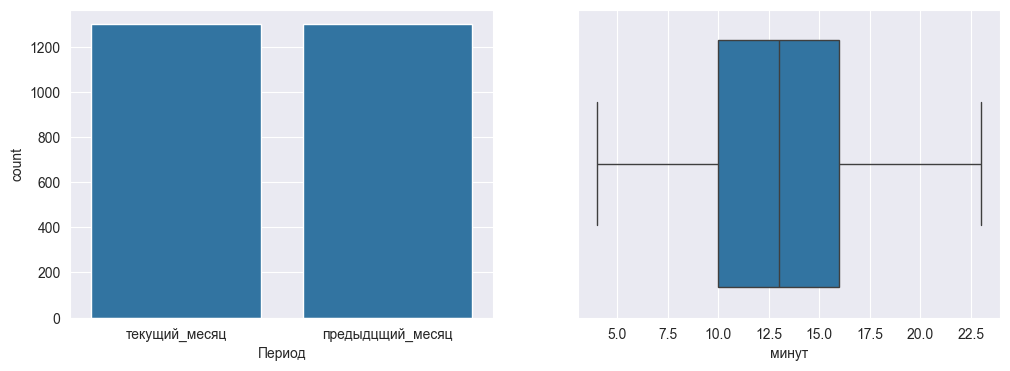

In [363]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=market_time, x='Период', ax=ax[0])
sns.boxplot(data=market_time, x='минут', ax=ax[1])

Здесь все хорошо, выбросов не наблюдается

### money

In [364]:
money = pd.read_csv('money.csv', encoding='UTF-8', skipinitialspace=True, delimiter=';', decimal=',')

In [365]:
money.head(10)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


Прибыль дана в 1000, нам, чтобы иметь абсолютную величину прибыли, надо умножить на 1000

In [366]:
money['Прибыль'] = money['Прибыль'].map(lambda x: x * 1000)
money.head(10)

,id,Прибыль
0,215348,980.0
1,215349,4160.0
2,215350,3130.0
3,215351,4870.0
4,215352,4210.0
5,215353,3950.0
6,215354,3620.0
7,215355,5260.0
8,215356,4930.0
9,215357,4660.0


In [367]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [368]:
money.iloc[:, 1:].describe()

,Прибыль
count,1300.000000
mean,3996.630769
std,1013.722112
min,860.000000
25%,3300.000000
50%,4045.000000
75%,4670.000000
max,7430.000000


<Axes: xlabel='Прибыль'>

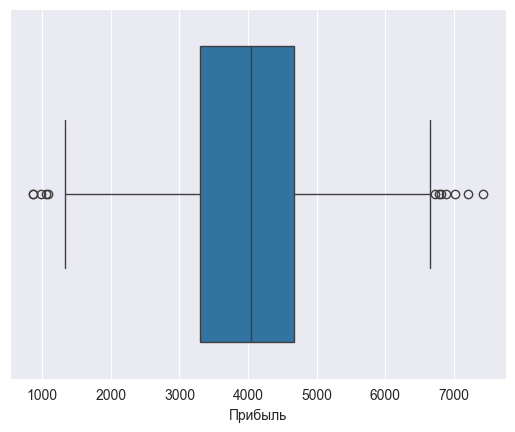

In [369]:
sns.boxplot(data=money, x='Прибыль')

Здесь есть выбросы, но они некритичные, давайте посмотрим на гистограмму

<Axes: xlabel='Прибыль', ylabel='Count'>

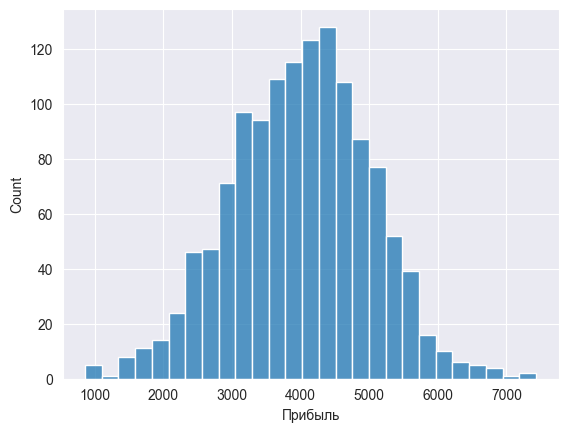

In [370]:
sns.histplot(data=money, x='Прибыль')

### forecast_chan

In [371]:
forecast_chan = pd.read_csv('forecast_chan.csv', encoding='cp1251', skipinitialspace=True, delimiter=';', decimal=',')

In [372]:
forecast_chan.head(10)

,вероятность,id
0,1.00,215349
1,0.12,215350
2,0.97,215351
3,0.90,215352
4,1.00,215353
5,0.26,215354
6,0.00,215355
7,0.83,215356
8,0.00,215358
9,1.00,215360


In [373]:
forecast_chan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   вероятность  1297 non-null   float64
 1   id           1297 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [374]:
forecast_chan.iloc[:, :1].describe()

,вероятность
count,1297.000000
mean,0.374449
std,0.387556
min,0.000000
25%,0.120000
50%,0.120000
75%,0.900000
max,1.000000


<Axes: xlabel='вероятность'>

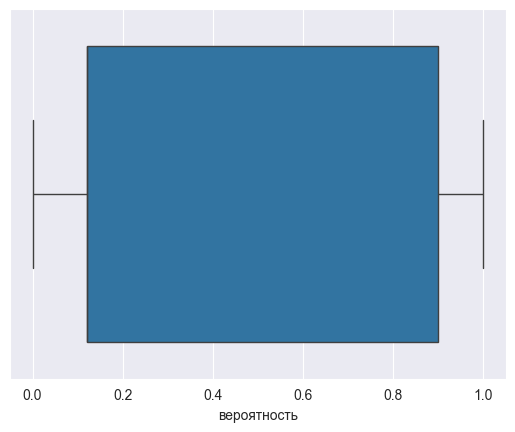

In [375]:
sns.boxplot(data=forecast_chan, x='вероятность')

Никаких выбросов нет, в данных проблем нет, дальше будем исследовать

## ВЫВОДЫ:
### market_file:
    - Тип сервиса: исправляем ошибку названия со стандартт на стандарт
    - Маркет_актив_6_мес: выбросы в меньшую сторону, некритичные, оставляем
    - Акционные_покупки: выбросы в большую сторону, присутствуют супервыбросы, их заменяем на медиану
    - Неоплаченные_продукты_штук_квартал: выбросы в большую сторону, некритичные, оставляем
### market_money:
    - Выручка: выбросы и в большую и в меньшую сторону, в большую и меньшую сторону есть супервыбросы, их заменяем
    - Выручка: для 3-го пункта, все покупатели вели активность за последние 3 месяца
### market_time:
    - Период: исправляем ошибку названия с предыдцщий на предыдущий
### money:
    - Прибыль: выбросы в большую и меньшую сторону, некритичные, оставляем

# 2. Предобработка

In [376]:
market_file.columns = market_file.columns.str.replace(' ', '_').str.lower()
market_money.columns = market_money.columns.str.replace(' ', '_').str.lower()
market_time.columns = market_time.columns.str.replace(' ', '_').str.lower()
money.columns = money.columns.str.replace(' ', '_').str.lower()
forecast_chan.columns = forecast_chan.columns.str.replace(' ', '_').str.lower()

Нашли ошибку в колонке тип сервиса: стандартт вместо стандарт и исправим ее

In [377]:
market_file['тип_сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [378]:
market_file.loc[market_file['тип_сервиса'] == 'стандартт', 'тип_сервиса'] = 'стандарт'
market_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

Нашли ошибку в колонке период: предыдцщий месяц вместо предыдущий месяц и исправим ее


In [379]:
market_time.loc[market_time['период'] == 'предыдцщий_месяц', 'период'] = 'предыдущий_месяц'
market_time

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13
...,...,...,...
2595,216645,текущий_месяц,18
2596,216646,предыдущий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10


Функции для выбросов в виде 3 интерквартильных размахов, нахождение медианы по группам, и замена выбросов медианой по группам

In [380]:
def ejection(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    return {'lower': q1 - iqr * 3, 'upper': q3 + iqr * 3}

def median_by_group(df, group_name, column_name):
    medians = {}
    if group_name == '':
        medians = df[column_name].median() 
    else:
        for name in df[group_name].unique():
            medians[name] = df.loc[df[group_name] == name, column_name].median()
    return medians

def replace_ejection_with_medians(df, group_name, column_name):
    lower = ejection(df, column_name).get('lower')
    upper = ejection(df, column_name).get('upper')
    medians = median_by_group(df, group_name, column_name)
    if group_name == '':
        mask = (df[column_name] < lower) | (df[column_name] > upper)
        df.loc[mask, column_name] = medians
    else:
        for group_value in df[group_name].unique():
            mask = ((df[column_name] < lower) | (df[column_name] > upper)) & (df[group_name] == group_value)
            df.loc[mask, column_name] = medians[group_value]

def replace_empty_with_medians(df, group_name, column_name):
    medians = median_by_group(df, group_name, column_name)
    for group_value in df[group_name].unique():
            df.loc[df[column_name].isna(), column_name] = medians[group_value]


Используем эту функцию для "маркет_актив_6_мес", заменяем медианой по группам "покупательская_активность"
и для других выбросов тоже

<Axes: xlabel='акционные_покупки'>

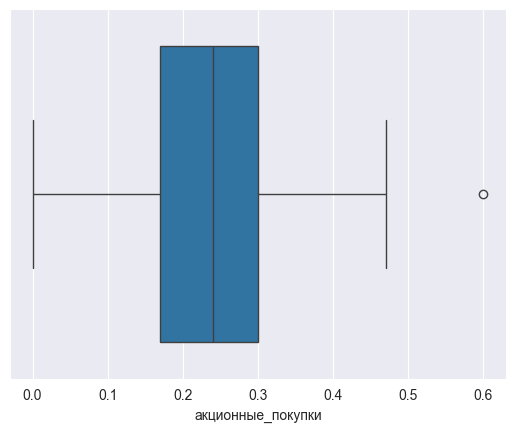

In [381]:
replace_ejection_with_medians(df=market_file, group_name='покупательская_активность', column_name='акционные_покупки')
sns.boxplot(data=market_file, x='акционные_покупки')

<Axes: xlabel='выручка'>

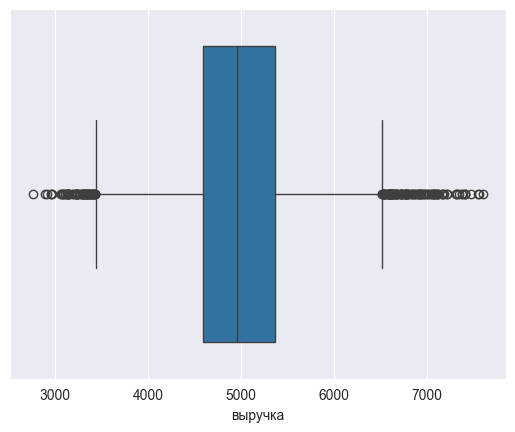

In [382]:
replace_ejection_with_medians(df=market_money, group_name='', column_name='выручка')
sns.boxplot(data=market_money, x='выручка')

Обычные выбросы оставляем, они - важная часть данных

Дальше смотрим на дубликаты и пропуски:

In [383]:
print(market_file.duplicated().sum())
print(market_money.duplicated().sum())
print(market_time.duplicated().sum())
print(money.duplicated().sum())
print(forecast_chan.duplicated().sum())

0
0
0
0
0


### Нет дублирующихся строк

Смотрим на наличие пропусков:

In [384]:
print(market_file.isna().mean())
print(market_money.isna().mean())
print(market_time.isna().mean())
print(money.isna().mean())
print(forecast_chan.isna().mean())

id                                     0.0
покупательская_активность              0.0
тип_сервиса                            0.0
разрешить_сообщать                     0.0
маркет_актив_6_мес                     0.0
маркет_актив_тек_мес                   0.0
длительность                           0.0
акционные_покупки                      0.0
популярная_категория                   0.0
средний_просмотр_категорий_за_визит    0.0
неоплаченные_продукты_штук_квартал     0.0
ошибка_сервиса                         0.0
страниц_за_визит                       0.0
dtype: float64
id         0.0
период     0.0
выручка    0.0
dtype: float64
id        0.0
период    0.0
минут     0.0
dtype: float64
id         0.0
прибыль    0.0
dtype: float64
вероятность    0.0
id             0.0
dtype: float64


### Нет пропусков

# 3. Исследовательский анализ данных

Функции для построения словаря нормальности - название столбца: True/False(нормально или нет)

In [385]:
def if_normal(df, column_name):
    statistic, p_value = shapiro(df[column_name])
    if p_value < 0.05:
        return False
    else:
        return True
    
def get_numeric(df):
    return df.select_dtypes(include=['float64', 'int64']).columns

def make_normality_dict(df):
    normality_dict = {}
    for column_name in get_numeric(df):
        normality_dict[column_name] = if_normal(df=df, column_name=column_name)
    return normality_dict

- Функция if_normal проверяет на нормальность количественный фактор, используя метод shapiro и доверительный интервал 0.05
- Функция get_numeric возвращает все количественные факторы с датасета
- Функция make_normality_dict возвращает словарь название фактора: True/False(нормально распределено/ненормально распределено)

In [386]:
normality_df = {'market_file': make_normality_dict(market_file),
    'market_money': make_normality_dict(market_money),
    'market_time': make_normality_dict(market_time),
    'money': make_normality_dict(money),
    'forecast_chan': make_normality_dict(forecast_chan),
}
normality_df

{'market_file': {'id': False,
  'маркет_актив_6_мес': False,
  'маркет_актив_тек_мес': False,
  'длительность': False,
  'акционные_покупки': False,
  'средний_просмотр_категорий_за_визит': False,
  'неоплаченные_продукты_штук_квартал': False,
  'ошибка_сервиса': False,
  'страниц_за_визит': False},
 'market_money': {'id': False, 'выручка': False},
 'market_time': {'id': False, 'минут': False},
 'money': {'id': False, 'прибыль': True},
 'forecast_chan': {'вероятность': False, 'id': False}}

### По выводу после 1-го пункта, что все клиенты вели клиентскую активность в течение последних 3-х месяцев можно утверждать, что таблица market_money и будет нашей таблицей для работы с клиентами, которые вели покупательскую активность   

## ВЫВОДЫ:
   - Я соорудил функции для проверки всех количественных факторов по нормальности, используя метод shapiro
   - Понял, что только в таблице money в столбце прибыль данные распределены нормально, в остальных ненормально

# 4. Объединение таблиц

In [387]:
market_file

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.31,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.31,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.31,Товары для детей,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


In [388]:
new_market_money = market_money.pivot_table(index='id', columns='период', values='выручка', aggfunc='sum').reset_index()
new_market_money.rename(columns={'предыдущий_месяц': 'выручка_предыдущий_месяц', 'препредыдущий_месяц': 'выручка_препредыдущий_месяц', 'текущий_месяц': 'выручка_текущий_месяц'}, inplace=True)
new_market_money

период,id,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215348,4957.5,4957.5,3293.1
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4
4,215352,5807.5,4594.0,5872.5
...,...,...,...,...
1295,216643,3664.0,4704.0,4741.7
1296,216644,4729.0,5299.0,5353.0
1297,216645,5160.0,5334.0,5139.2
1298,216646,4923.0,4725.0,5224.6


Здесь меняем названия факторов для дальнейшего удобного использования и также для того чтобы избежать конфликтов в названиях.

In [389]:
new_market_time = market_time.pivot_table(index='id', columns='период', values='минут', aggfunc='sum').reset_index()
new_market_time.rename(columns={'предыдущий_месяц': 'время_предыдущий_месяц', 'текущий_месяц': 'время_текущий_месяц'}, inplace=True)
new_market_time

период,id,время_предыдущий_месяц,время_текущий_месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11
...,...,...,...
1295,216643,14,7
1296,216644,12,11
1297,216645,12,18
1298,216646,18,7


Здесь делаем ту же процедуру

In [390]:
merged_time_money = new_market_money.merge(new_market_time, on='id', how='inner')
df = market_file.merge(merged_time_money, on='id', how='inner')
df

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,4957.5,4957.5,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.31,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.31,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.31,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


## Благодаря pivot_table объединили таблицы

# 5. Корреляционный анализ 

In [391]:
def all_correlations(df):
    ans = {}
    columns = get_numeric(df)
    pairs = []
    # фор начинаем с 1, чтобы пропустить id
    for i in range(1, len(columns) - 1):
        for j in range(i + 1, len(columns)):
            pairs.append((columns[i], columns[j]))
    for pair in pairs:
        first, second = pair[0], pair[1]
        statistic, p_value = spearmanr(df[first], df[second]) # все колонки распределены ненормально, кроме "прибыль" в money
        ans[pair] = (round(statistic, 2), p_value)
    return dict(sorted(ans.items(), key=lambda x: abs(x[1][0]), reverse=True)) # sort by correlation


def print_correlations(d):
    for key, value in d.items():
        print(f"[{key[0]} -- {key[1]}] \t corr= {value[0]}; \t p_val = {value[1]}")


def draw_heatmaps(d):
    rows = len(d) // 2
    fig, axes = plt.subplots(rows, 2, figsize=(rows * 3, rows * 4))
    for i, (key, value) in enumerate(d.items()):
        row = i // 2
        col = i % 2
        sns.heatmap(data=df[[key[0], key[1]]].corr(method='spearman'), annot=True, ax=axes[row, col])
        
    
    plt.tight_layout()
    plt.show()

Используем метод спирмена, так как мы до этого сделали вывод, что все данные, кроме прибыли в таблице money распределены ненормально, для пирсона нужно, чтобы оба

In [392]:
dict_of_corrs = all_correlations(df)
dict_of_corrs

{('выручка_предыдущий_месяц', 'выручка_текущий_месяц'): (0.87, 0.0),
 ('страниц_за_визит', 'время_предыдущий_месяц'): (0.45,
  4.2590049965646444e-66),
 ('акционные_покупки', 'страниц_за_визит'): (-0.39, 1.3773556429146194e-49),
 ('акционные_покупки', 'время_предыдущий_месяц'): (-0.36,
  1.197259565343897e-41),
 ('время_предыдущий_месяц', 'время_текущий_месяц'): (0.36,
  3.4739444032480233e-41),
 ('выручка_препредыдущий_месяц', 'время_предыдущий_месяц'): (0.35,
  2.526584676563636e-38),
 ('маркет_актив_6_мес', 'страниц_за_визит'): (0.32, 2.5467970083240914e-32),
 ('страниц_за_визит', 'выручка_препредыдущий_месяц'): (0.31,
  2.743585930609976e-30),
 ('выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц'): (0.31,
  5.051598825435899e-30),
 ('акционные_покупки', 'выручка_препредыдущий_месяц'): (-0.3,
  8.012883262597017e-28),
 ('акционные_покупки', 'время_текущий_месяц'): (-0.3, 1.0206810758889177e-27),
 ('страниц_за_визит', 'время_текущий_месяц'): (0.3, 2.750014573044838e-28),
 ('выр

In [393]:
top10_dict_of_corrs = dict(list(dict_of_corrs.items())[:10])
# выведем топ 10 самых значимых корреляций
print_correlations(top10_dict_of_corrs)

[выручка_предыдущий_месяц -- выручка_текущий_месяц] 	 corr= 0.87; 	 p_val = 0.0
[страниц_за_визит -- время_предыдущий_месяц] 	 corr= 0.45; 	 p_val = 4.2590049965646444e-66
[акционные_покупки -- страниц_за_визит] 	 corr= -0.39; 	 p_val = 1.3773556429146194e-49
[акционные_покупки -- время_предыдущий_месяц] 	 corr= -0.36; 	 p_val = 1.197259565343897e-41
[время_предыдущий_месяц -- время_текущий_месяц] 	 corr= 0.36; 	 p_val = 3.4739444032480233e-41
[выручка_препредыдущий_месяц -- время_предыдущий_месяц] 	 corr= 0.35; 	 p_val = 2.526584676563636e-38
[маркет_актив_6_мес -- страниц_за_визит] 	 corr= 0.32; 	 p_val = 2.5467970083240914e-32
[страниц_за_визит -- выручка_препредыдущий_месяц] 	 corr= 0.31; 	 p_val = 2.743585930609976e-30
[выручка_предыдущий_месяц -- выручка_препредыдущий_месяц] 	 corr= 0.31; 	 p_val = 5.051598825435899e-30
[акционные_покупки -- выручка_препредыдущий_месяц] 	 corr= -0.3; 	 p_val = 8.012883262597017e-28


Нарисуем Heatmap'ы для наглядности

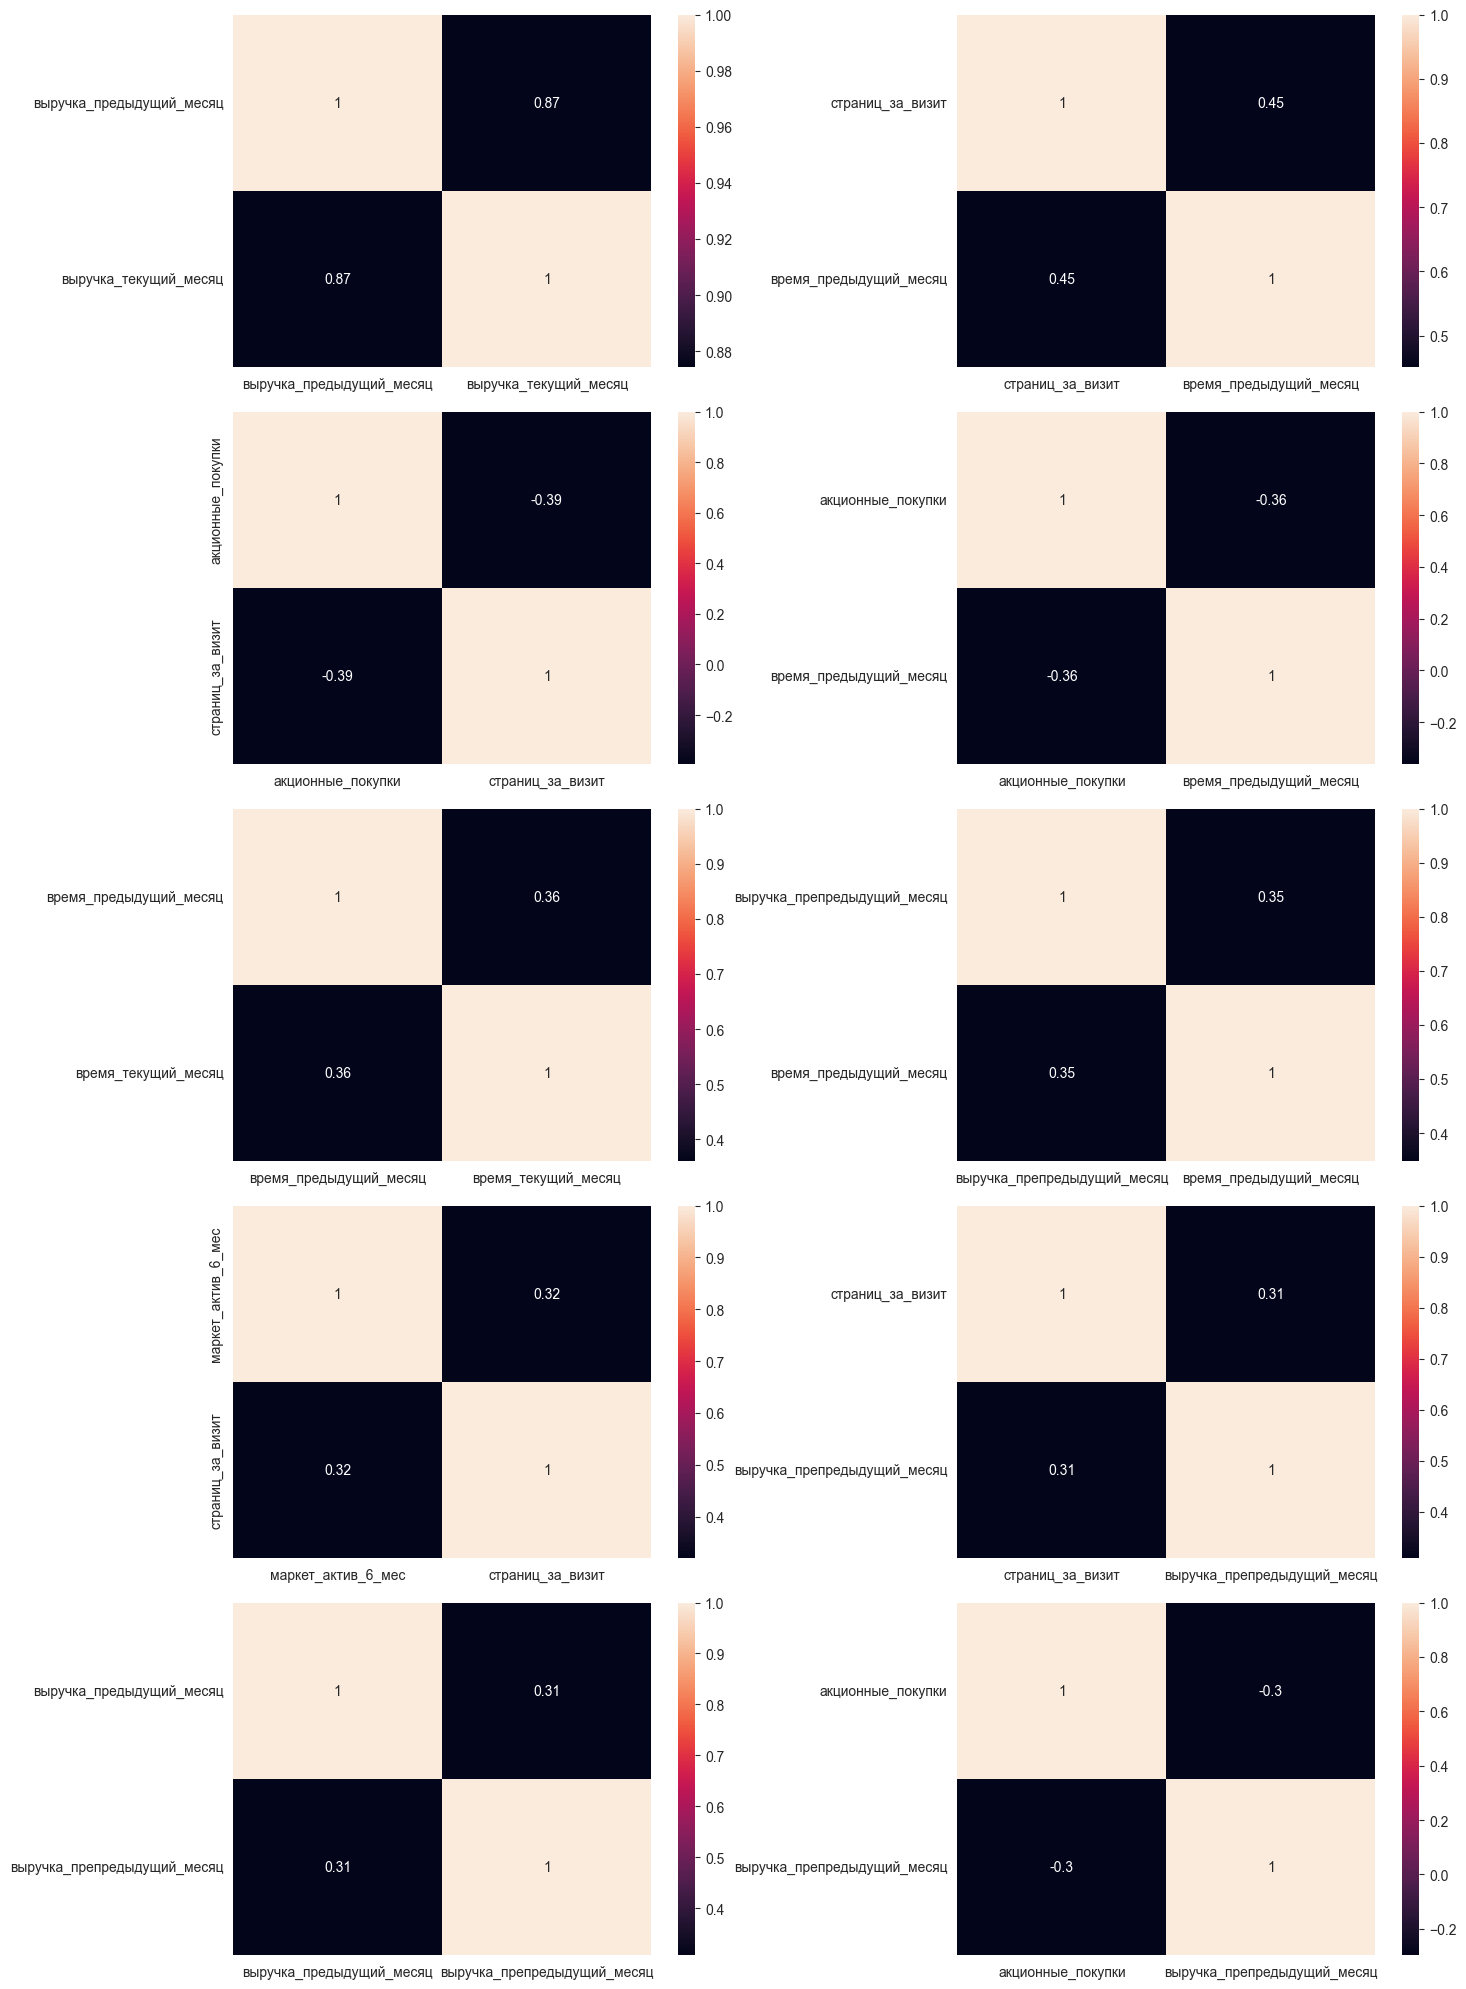

In [394]:
draw_heatmaps(top10_dict_of_corrs)

## Выводы:
   1.  Между выручкой за предыдущий месяц и выручкой за текущий месяц есть сильная положительная корреляция(~0.87) и p_value=0, что подталкивает нас на вывод о том, что клиенты, которые вели покупательскую активность в предыдущем месяце, с большой вероятностью будут у нас дальше закупаться. Значит клиенты довольны продуктами нашего сервиса и готовы в следующем месяце также вести покупательскую активность.
   
   2. Также можем заметить, что чем больше покупатели посещают страниц нашего сайта за визит, тем больше они проводят времени на сайте, что вполне очевидно :D. Об этом свидетельствует достаточно сильная корреляция(~0.45) и близость p_value к нулю означает, что указывает на статистическую значимость этой корреляции. Стоит заметить, что во всех дальнейших статистических вычислениях p_value очень близок к нулю, поэтому далее будет браться статистическая значимость корреляций как данность.
  
   3. Дальше, количество акционных покупок и количество страниц за визит имеют умеренную отрицательную корреляцию(-0.39), как и со временем, проведенным на сайте в предыдущем месяце(-0.36) и в текущем месяце(-0.3). Тогда стоит полагать, что, чем меньше клиенты покупают товары по акции, тем дольше они проводят на сайте и тем больше страниц посещают за визит.
   
   4. Время, проведенное на сайте в предыдущем месяце имеет умеренную положительную корреляцию(0.36) с текущим месяцем. Это показывает последовательную заинтересованность клиента с месяца на месяц. Выручка в препредыдущем месяце имеет также умеренную положительную корелляцию со временем в предыдущем месяце(0.35). Это означает, что клиент, однажды купивший в этом магазине товар, возвращается на сайт и проводит время на сайте, значит хочет купить еще, что доказывает мою мысль в 1 пункте.

# 6. Сегментация покупателей

Сначала объединим столбец вероятность в таблице моделирования с нашей итоговой таблицей 

In [395]:
forecast_chan

,вероятность,id
0,1.00,215349
1,0.12,215350
2,0.97,215351
3,0.90,215352
4,1.00,215353
...,...,...
1292,0.25,216643
1293,0.00,216644
1294,0.12,216645
1295,0.00,216646


Обращаем внимание перед совмещением в общую таблицу на то, что кол-во строк 1297, и id начинается с 215349, когда везде начинаются с 215348. Существуют пропуски и их будем удалять

In [396]:
df['прибыль'] = money['прибыль']
df = df.merge(forecast_chan, on='id', how='left', suffixes=('', '_forecast'))
replace_empty_with_medians(df, 'покупательская_активность', 'вероятность')

Совмещаем две таблицы по айди, методом лефт. Удаляем пропуски и заполняем медианой по группе покупательская активность

In [397]:
segment = df[(df['вероятность'] > df['вероятность'].quantile(0.7)) & (df['прибыль'] > df['прибыль'].quantile(0.9))]

Отсегментировали покупателей с большой вероятностью снижения покупательской активности(выше 0.62) и по прибыли самых прибыльных(больше 5250), чтобы для этого сегмента покупателей можно было сделать выводы. Я так сегментировал покупателей, которые произвели крупные покупки, либо в течение долгого времени были клиентами нашего магазина, но затем они возможно разочаровались, вследствие чего вероятность снижения их покупательской активности очень высока. Дальше будем анализировать  

In [398]:
segment

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц,прибыль,вероятность
20,215368,Снизилась,премиум,да,3.8,5,829,0.24,Техника для красоты и здоровья,2,2,6,1,5823.0,4536.0,5591.6,11,9,6270.0,1.00
42,215390,Снизилась,стандарт,да,3.1,4,152,0.33,Косметика и аксесуары,6,4,2,5,4254.0,4549.0,4612.8,8,12,5700.0,0.97
43,215391,Снизилась,премиум,да,3.5,3,754,0.30,Косметика и аксесуары,3,1,2,1,5928.5,4556.0,5824.5,10,11,5440.0,1.00
53,215401,Снизилась,премиум,да,3.4,5,339,0.30,Косметика и аксесуары,2,3,3,4,5548.5,4833.0,6065.9,10,8,7430.0,1.00
91,215439,Снизилась,премиум,нет,3.4,5,448,0.28,Товары для детей,4,2,2,7,5484.0,4551.0,5833.7,9,9,6330.0,1.00
101,215449,Снизилась,премиум,да,2.4,3,666,0.39,Кухонная посуда,3,5,2,3,5051.0,4301.0,5223.9,10,13,5640.0,0.97
108,215456,Снизилась,стандарт,да,1.7,4,449,0.23,Косметика и аксесуары,3,4,4,5,5134.5,4353.0,6318.8,10,9,5830.0,0.90
136,215484,Снизилась,премиум,нет,2.9,5,448,0.23,Товары для детей,4,2,6,3,5059.0,4267.0,5018.7,5,7,5640.0,1.00
137,215485,Снизилась,стандарт,да,3.5,4,720,0.31,Косметика и аксесуары,1,2,4,7,4201.0,4234.0,5065.5,10,14,5410.0,1.00
171,215519,Снизилась,премиум,да,3.1,5,824,0.31,Товары для детей,2,2,4,4,3680.0,4802.0,4283.2,8,8,5560.0,1.00


In [399]:
def print_mean_median(df, column_name):
    print(f'{column_name}: mean={round(df[column_name].mean(), 2)}, median={df[column_name].median()}')

In [400]:
print_mean_median(segment, 'маркет_актив_6_мес')
print_mean_median(segment, 'маркет_актив_тек_мес')

маркет_актив_6_мес: mean=3.76, median=3.65
маркет_актив_тек_мес: mean=4.29, median=4.0


Можем наблюдать рост в количестве маркетинговых коммуникаций между последними 6 месяцами и текущим месяцем. Это свидетельствует о том, что компания сейчас всячески старается напомнить о себе (рассылки, рекламы и тд.) клиентам сильнее, чем раньше. Это может надоесть клиенту, вследствие чего он может покинуть наш сервис.

<Axes: xlabel='покупательская_активность'>

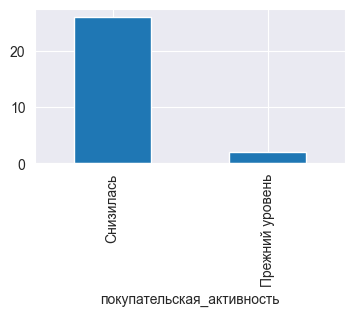

In [401]:
segment['покупательская_активность'].value_counts().plot(kind='bar', figsize=(4, 2))

In [402]:
print_mean_median(segment, 'выручка_препредыдущий_месяц')
print_mean_median(segment, 'выручка_предыдущий_месяц')
print_mean_median(segment, 'выручка_текущий_месяц')

выручка_препредыдущий_месяц: mean=4712.96, median=4704.0
выручка_предыдущий_месяц: mean=4954.55, median=5055.0
выручка_текущий_месяц: mean=5333.69, median=5326.65


Можем наблюдать рост в выручке за последние три месяца, хотя покупательская активность у многих клиентов снизилась. Это говорит о том, что цена на единицу товаров повышалась, возможно даже слишком быстро, что клиенту стало не по карману

In [403]:
print_mean_median(segment, 'время_предыдущий_месяц')
print_mean_median(segment, 'время_текущий_месяц')

время_предыдущий_месяц: mean=10.61, median=10.0
время_текущий_месяц: mean=10.64, median=10.0


Не наблюдается изменений во времени, проведенном на сайте, в течение последних двух месяцев.

<Axes: xlabel='популярная_категория'>

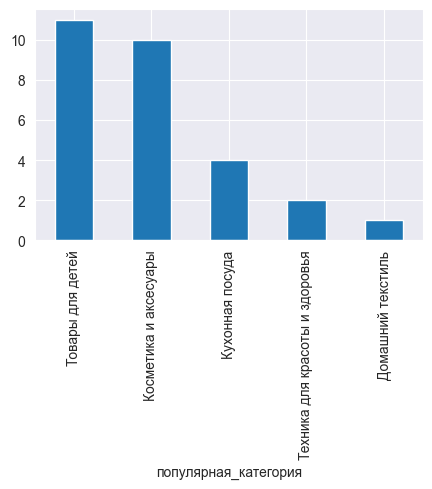

In [404]:
segment['популярная_категория'].value_counts().plot(kind='bar', figsize=(5, 3))

Преобладают товары для детей и косметика и аксессуары. Могу предполагать, что в большинстве случаев закупаются женщины, и возможно даже мамы, вместе с товарами для детей.

# В общем:
  - Я взял сегмент покупателей, у которых большая прибыльность, но также очень большая вероятность снижения активности. Данный сегмент больше всего описывает покупателей, которые производили большое количество покупок, либо небольшое количество дорогих покупок и затем, возможно, им не понравился наш сервис.
  - Я предлагаю делать персонализированную рекламу товаров для детей, запускать рекламу для женщин с детьми, что можно ухаживать за собой, уделяя большой фокус на ребенка и все это находится в нашем магазине. Также стоит немного уменьшить маркетинговые коммуникации с клиентом(рассылки, рекламы) и уделить больше внимания на качество, чем количество. Эти решения могут помочь в удержании покупательской активности клиентов с наибольшей прибыльностью. Это потому что клиенты с большой прибыльностью зачастую уже доверяют компании и готовы тратить свой бюджет на товары в нашем магазине, но порой их может раздражать большое количество бесполезной рекламы, что они готовы не работать с нами.

## Задача:

Задача состояла в том, чтобы понять, какие факторы способствуют понижению покупательской активности, определить вектор развития компании, чтобы покупательская активность повышалась. Разработать решение для повышения покупательской активности.

## Данные и предобработка:

На вход давались 5 таблиц: market_file, market_money, market_time, money, forecast_chan. Я удалил супервыбросы, провел необходимую работу с ошибками как в названии факторов, так и в значениях факторов. Не нашлось дубликатов и пропусков в данных, поэтому этой части работы не было. 

## Мой вывод:

После анализа всех таблиц с данными, всех факторов и связей между ними, спешу утверждать, что в этой компании очень хорошо налажена структура повторного завлечения/удержания клиента, существует прямая связь между проведенным временем на сайте и с выручкой, так что стоит обратить внимание на сайт, возможно постараться делать интерактивы на сайте для клиентов или сделать программу лояльности для клиентов, которым падает бонус за покупки на сайте.
Также, по работе DS в таблице forecast_chan и его совмещение с общей таблицей определилось, что те покупатели, у которых активность снизилась, имеют намного больший шанс уменьшения покупательской активности, чем у тех, у кого активность осталась на прежнем уровне. В частности в сегменте клиентов, у которых высокий шанс уменьшения активности клиентов и высокая прибыльность, нужно работать насчет рекламной кампании, запуская возможно одну качественную рекламу. Также стоит обратить внимание, что быстрый рост цен также может спугнуть клиентов, поэтому предлагаю уменьшить расходы на другие отделы, допустим маркетинг, тем самым не повышая цены и не терять в прибыли.